# Aquire dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emnist

import torch 
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [2]:
def get_data():
    X, Y = emnist.extract_training_samples('letters')
    X_test, Y_test = emnist.extract_test_samples('letters')

    return X, Y- 1, X_test, Y_test - 1

In [3]:
X, m_Y, X_test, m_Y_test = get_data()

In [4]:
X.shape

(124800, 28, 28)

In [5]:
X = torch.tensor(np.array(X), dtype=torch.float)
X_test = torch.tensor(np.array(X_test), dtype=torch.float)

In [6]:
m = X.shape[0]

In [7]:
Y = torch.zeros(m,26, dtype = torch.float)
Y_test = torch.zeros(X_test.shape[0],26, dtype = torch.long)
for i in range(0,m):
    Y[i, m_Y[i]] = 1
for i in range(0,X_test.shape[0]):
    Y_test[i, m_Y_test[i]] = 1

In [8]:
train_dataset = TensorDataset(X, Y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [9]:
def show_img(i):
    plt.imshow(i)

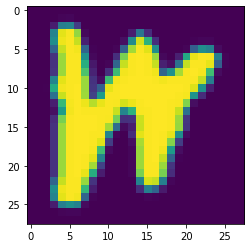

In [10]:
show_img(X[0])

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,120)
        self.fc3 = nn.Linear(120,26)
    
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        #x = F.softmax(self.fc3(x), dim = -1)
        return x

model = Net().to("cuda")

In [12]:
#constants 

learning_rate = 0.0001
batch_size = 64
epochs = 10

In [13]:
loss_fn = nn.CrossEntropyLoss()

In [14]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)

In [15]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        x, y = x.to("cuda"), y.to("cuda")
        pred = model(x)
        loss = loss_fn(pred, y)
        # print(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            if batch % 100 == 0:
                loss, current = loss.item(), batch * len(x)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
print('training finished')

Epoch 1
-------------------------------
loss: 12.170162  [    0/124800]
loss: 2.703858  [ 6400/124800]
loss: 2.302884  [12800/124800]
loss: 2.340633  [19200/124800]
loss: 1.945207  [25600/124800]
loss: 1.812243  [32000/124800]
loss: 1.686555  [38400/124800]
loss: 1.640617  [44800/124800]
loss: 1.360345  [51200/124800]
loss: 1.812260  [57600/124800]
loss: 1.299847  [64000/124800]
loss: 1.419523  [70400/124800]
loss: 1.294485  [76800/124800]
loss: 1.367918  [83200/124800]
loss: 0.904358  [89600/124800]
loss: 1.150949  [96000/124800]
loss: 0.908235  [102400/124800]
loss: 1.096666  [108800/124800]
loss: 0.764085  [115200/124800]
loss: 1.056313  [121600/124800]
Epoch 2
-------------------------------
loss: 0.667394  [    0/124800]
loss: 1.082408  [ 6400/124800]
loss: 0.727877  [12800/124800]
loss: 0.609448  [19200/124800]
loss: 1.003450  [25600/124800]
loss: 0.508512  [32000/124800]
loss: 0.589804  [38400/124800]
loss: 0.801607  [44800/124800]
loss: 0.694210  [51200/124800]
loss: 0.628308  

In [16]:
torch.save(model, "noice.pth")

In [17]:
count = 0

m_test = X_test.shape[0]

with torch.no_grad():
    for (x, y) in test_dataloader:
        x, y = x.to("cuda"), y.to("cuda")
        count += torch.sum(torch.argmax(model(x),1) == torch.argmax(y,1))

In [18]:
count

tensor(18442, device='cuda:0')

In [19]:
count/m_test * 100

tensor(88.6635, device='cuda:0')